/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_27665/1341924827.py:42: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  points_in_neighborhoods = gpd.sjoin(gdf_points, merged_data, op='within')


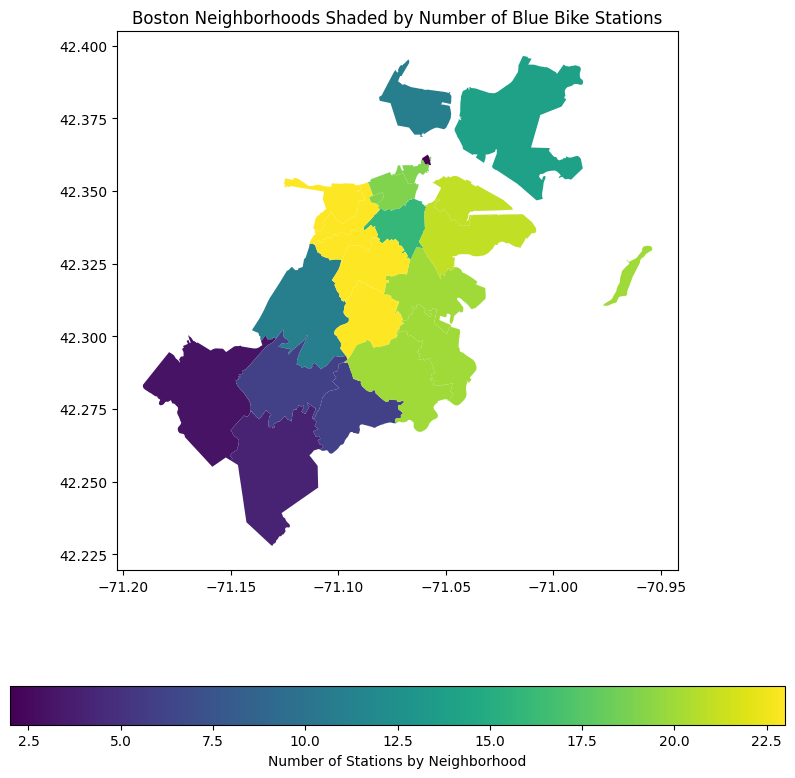

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from Helpful_functions import get_lat_long



#? Did this as a failed experiment to see if I could get the number of stations in each neighborhood, however the zip codees more unintuitive than I thought so I got another data set 
#? but I thought this highlighted some of the things I learned in the course so I kept it in the repo
neighborhood_data = {
    "Neighborhood": [
        "Allston/Brighton", "Back Bay", "Central Boston", "Charlestown",
        "Dorchester", "East Boston", "Fenway/Kenmore", "Hyde Park",
        "Jamaica Plain", "Mattapan", "Roslindale", "Roxbury",
        "South Boston", "South End"
    ],
    "ZIP Codes": [
        "02108, 02116, 02117, 02123, 02133, 02199, 02216, 02217, 02295",
        "02201, 02202, 02203, 02204, 02205, 02206, 02207, 02208, 02209, 02211, 02212, 02222, 02293",
        "02129", "02122, 02124, 02125", "02128, 02228", "02115, 02215",
        "02136", "02130", "02126", "02131", "02119, 02120, 02121",
        "02127, 02210", "02118", "02132"
    ]
}

#? I have more accurate data than this since mapping zip codes to neighborhoods is harder than I thought
neighborhood_df = pd.DataFrame(neighborhood_data)
expanded_zip_codes = neighborhood_df['ZIP Codes'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
neighborhood_df = neighborhood_df.drop(columns=['ZIP Codes']).join(expanded_zip_codes.rename('ZIP5')).reset_index(drop=True)

zip_shapes = gpd.read_file('../data/ZIP_Codes.geojson')

zip_shapes['ZIP5'] = zip_shapes['ZIP5'].astype(str)

merged_data = zip_shapes.merge(neighborhood_df, on='ZIP5')



points_df = pd.read_csv('Blue_Bike_Stations.csv')
gdf_points = gpd.GeoDataFrame(points_df, geometry=gpd.points_from_xy(points_df.Longitude, points_df.Latitude))

points_in_neighborhoods = gpd.sjoin(gdf_points, merged_data, op='within')

neighborhood_station_counts = points_in_neighborhoods.groupby('Neighborhood').size().reset_index(name='StationCount')

neighborhoods_with_counts = merged_data.merge(neighborhood_station_counts, on='Neighborhood', how='left').fillna(0)

fig, ax = plt.subplots(figsize=(10, 10))
neighborhoods_with_counts.plot(column='StationCount', ax=ax, legend=True,
                               legend_kwds={'label': "Number of Stations by Neighborhood",
                                            'orientation': "horizontal"})
plt.title('Boston Neighborhoods Shaded by Number of Blue Bike Stations')
plt.show()



/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


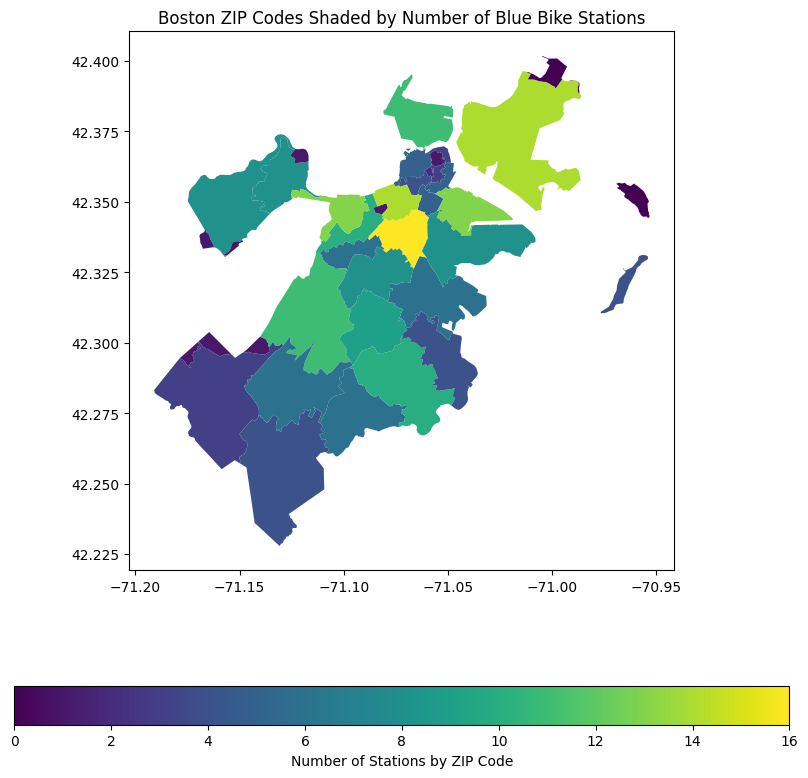

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


#? Instead of using the neighborhoods I used the zip codes to get a more accurate count of the number of stations in each area
#? BUT thats not very intuitive if we were to analyze nieghborhoods but this is here if the clients ever get to see this 
#? Since I would never put this in the presentation
zip_shapes = gpd.read_file('../data/ZIP_Codes.geojson') 
zip_shapes['ZIP5'] = zip_shapes['ZIP5'].astype(str)

points_df = pd.read_csv('../data/Blue_Bike_Stations.csv')  


#?Making a geodataframe from the points data 
gdf_points = gpd.GeoDataFrame(
    points_df, 
    geometry=gpd.points_from_xy(points_df.Longitude, points_df.Latitude),
    crs='EPSG:4326'
)

#? Joining the two dataframes 
points_in_zip = gpd.sjoin(gdf_points, zip_shapes, op='within')

zip_station_counts = points_in_zip.groupby('ZIP5').size().reset_index(name='StationCount')

zip_shapes_with_counts = zip_shapes.merge(zip_station_counts, on='ZIP5', how='left').fillna(0)

fig, ax = plt.subplots(figsize=(10, 10))
zip_shapes_with_counts.plot(column='StationCount', ax=ax, legend=True,
                            legend_kwds={'label': "Number of Stations by ZIP Code",
                                         'orientation': "horizontal"})
plt.title('Boston ZIP Codes Shaded by Number of Blue Bike Stations')
plt.show()


/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_27665/2675367031.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


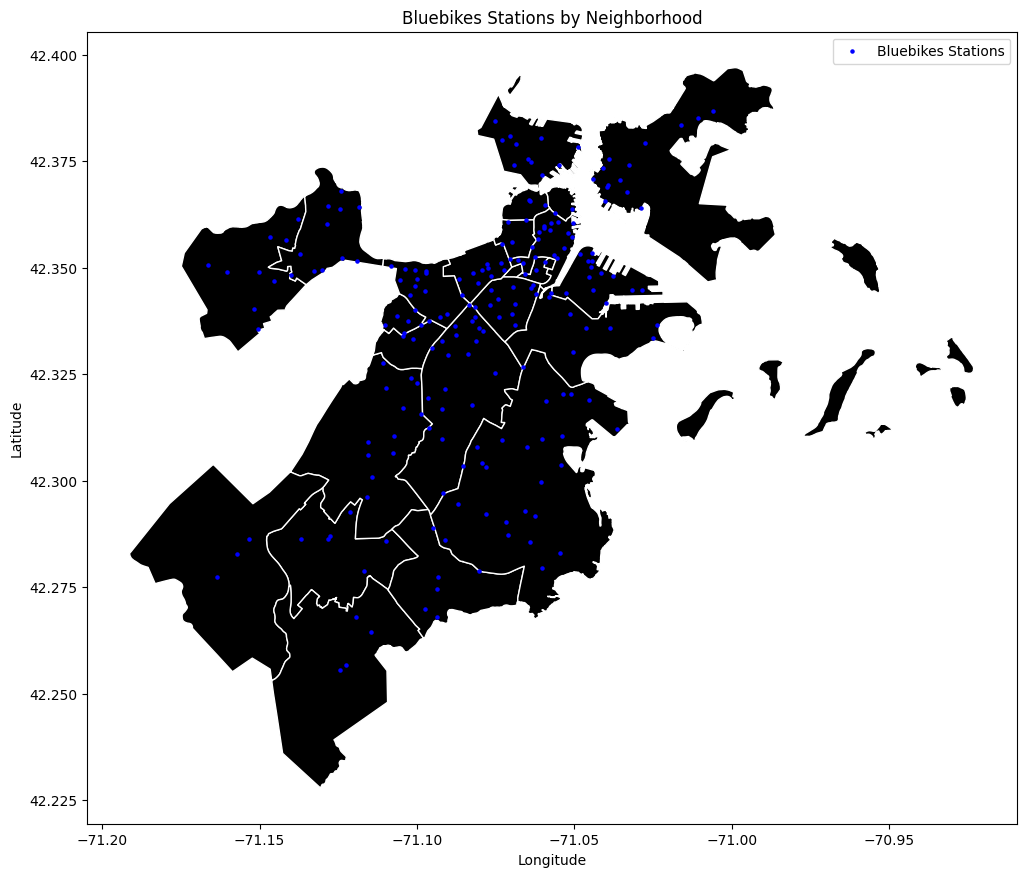

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#?Reloading the file incase I accidentally modified it earlier in the notebook
neighborhoods_gdf = gpd.read_file('../data/BPDA_Neighborhood_Boundaries.geojson')  

stations_df = pd.read_csv('../data/Blue_Bike_Stations.csv')  
stations_gdf = gpd.GeoDataFrame(
    stations_df, 
    geometry=gpd.points_from_xy(stations_df.Longitude, stations_df.Latitude),
    crs='EPSG:4326'
)

stations_in_neighborhoods = gpd.sjoin(stations_gdf, neighborhoods_gdf, how='inner', op='within')

fig, ax = plt.subplots(figsize=(12, 12))
neighborhoods_gdf.plot(ax=ax, color='black', edgecolor='white', label='Neighborhoods')
stations_in_neighborhoods.plot(ax=ax, markersize=5, color='blue', label='Bluebikes Stations')
plt.legend()
plt.title('Bluebikes Stations by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [5]:
import folium
from folium.plugins import HeatMap
import pandas as pd


#?A really cool heatmap showing the concentration and locations of the blue bike stations, VERY COMPUTATIONALLY INTENSIVE (atleast for my computer :( )
stations_df = pd.read_csv('../data/Blue_Bike_Stations.csv')  

map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13)


heat_data = [[row['Latitude'], row['Longitude']] for index, row in stations_df.iterrows()]
HeatMap(heat_data).add_to(map_boston)


map_boston.save('bluebikes_heatmap.html')


/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


             X          Y  Number  \
0   -71.128525  42.360274  A32040   
2   -71.073046  42.380045  D32060   
4   -71.098870  42.336586  B32033   
6   -71.116012  42.296067  C32089   
7   -71.122509  42.256838  E32013   
..         ...        ...     ...   
410 -71.045693  42.351586  C32034   
415 -71.096271  42.337586  B32021   
416 -71.064467  42.365908  D32022   
418 -71.092189  42.332863  B32059   
419 -71.107669  42.306539  D32040   

                                                  Name   Latitude  Longitude  \
0                                        Honan Library  42.360274 -71.128525   
2                                            Hood Park  42.380045 -71.073046   
4                           Huntington Ave at Mass Art  42.336586 -71.098870   
6                        Hyde Park Ave at Walk Hill St  42.296067 -71.116012   
7                                    Hyde Park Library  42.256838 -71.122509   
..                                                 ...        ...        ..

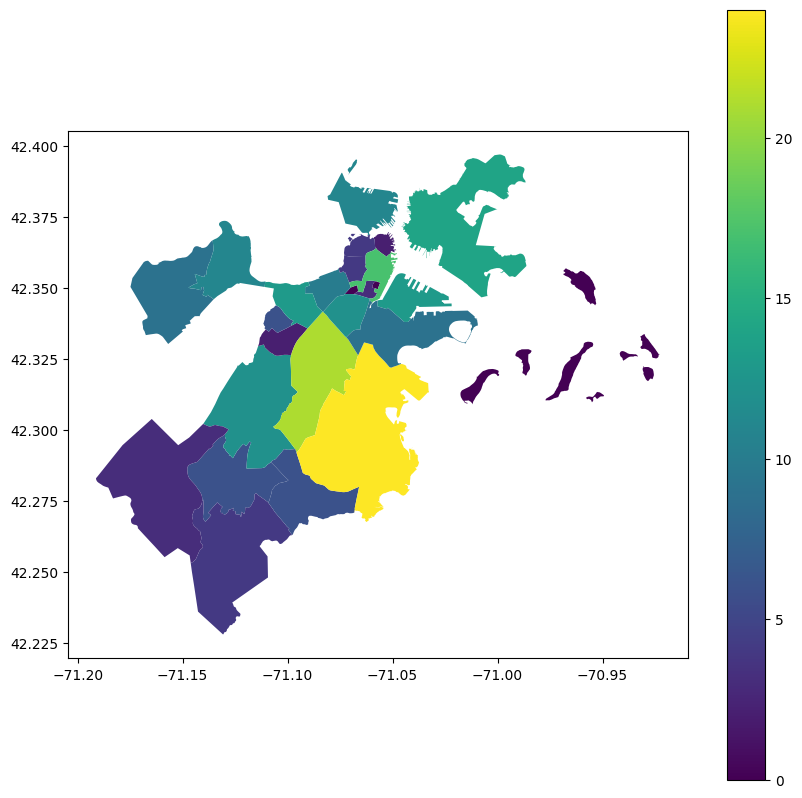

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


#? ALot of this code is copy pasted but here I basically used a different geodataset that maps out the nieghborhoods


neighborhoods_gdf = gpd.read_file('../data/BPDA_Neighborhood_Boundaries.geojson')  

stations_df = pd.read_csv('../data/Blue_Bike_Stations.csv')  

stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)


stations_with_neighborhoods = gpd.sjoin(stations_gdf, neighborhoods_gdf, op='within')
print(stations_with_neighborhoods)

station_counts = stations_with_neighborhoods['name'].value_counts().reset_index()
station_counts.columns = ['name', 'station_count']

merged_gdf = neighborhoods_gdf.merge(station_counts, on='name', how='left')

merged_gdf['station_count'] = merged_gdf['station_count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='station_count', ax=ax, legend=True, cmap='viridis')
plt.show()


Index(['Name', 'Total:', 'Same house 1 year ago:', '%',
       'Moved within same county:', '%.1',
       'Moved from different county within same state:', '%.2',
       'Moved from different state:', '%.3', 'Moved from abroad:', '%.4'],
      dtype='object')
                       Name    Total:  Same house 1 year ago:      %  \
3                   Allston   19240.0                 11775.0  61.2%   
4                  Back Bay   17659.0                 12449.0  70.5%   
5               Beacon Hill    9629.0                  6675.0  69.3%   
6                  Brighton   54937.0                 39938.0  72.7%   
7               Charlestown   19401.0                 16529.0  85.2%   
8                Dorchester  125045.0                107377.0  85.9%   
9                  Downtown   18189.0                 12666.0  69.6%   
10              East Boston   46868.0                 38545.0  82.2%   
11                   Fenway   33450.0                 19349.0  57.8%   
12                Hy

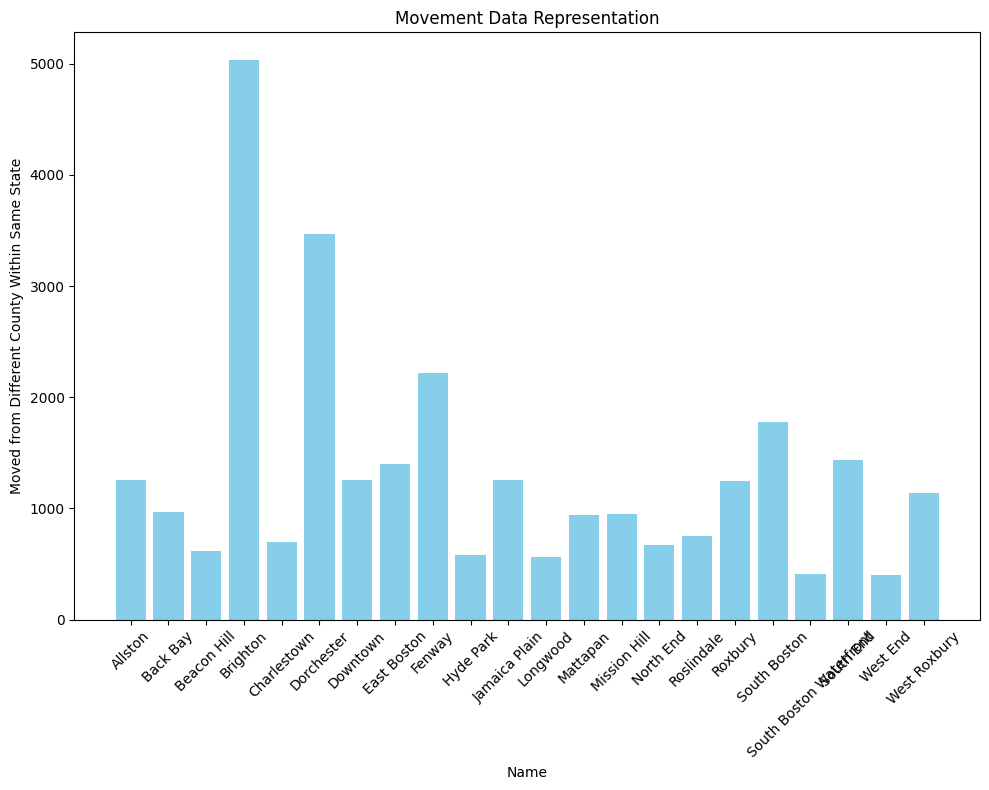

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/Movement.csv')

print(data.columns)

#?Removing Boston, Mass, and Us 
data = data[data['Name'] != 'United States']
data = data[data['Name'] != 'Massachusetts']

data = data[data['Name'] != 'Boston']

data = data.dropna()


print(data)

plt.figure(figsize=(10, 8))
plt.bar(data['Name'], data['Moved from different county within same state:'].astype(int), color='skyblue')
plt.xlabel('Name')  
plt.ylabel('Moved from Different County Within Same State')  
plt.title('Movement Data Representation')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


Index(['Name', 'Total:', 'Same house 1 year ago:', '%',
       'Moved within same county:', '%.1',
       'Moved from different county within same state:', '%.2',
       'Moved from different state:', '%.3', 'Moved from abroad:', '%.4'],
      dtype='object')
                       Name    Total:  Same house 1 year ago:      %  \
3                   Allston   19240.0                 11775.0  61.2%   
4                  Back Bay   17659.0                 12449.0  70.5%   
5               Beacon Hill    9629.0                  6675.0  69.3%   
6                  Brighton   54937.0                 39938.0  72.7%   
7               Charlestown   19401.0                 16529.0  85.2%   
8                Dorchester  125045.0                107377.0  85.9%   
9                  Downtown   18189.0                 12666.0  69.6%   
10              East Boston   46868.0                 38545.0  82.2%   
11                   Fenway   33450.0                 19349.0  57.8%   
12                Hy

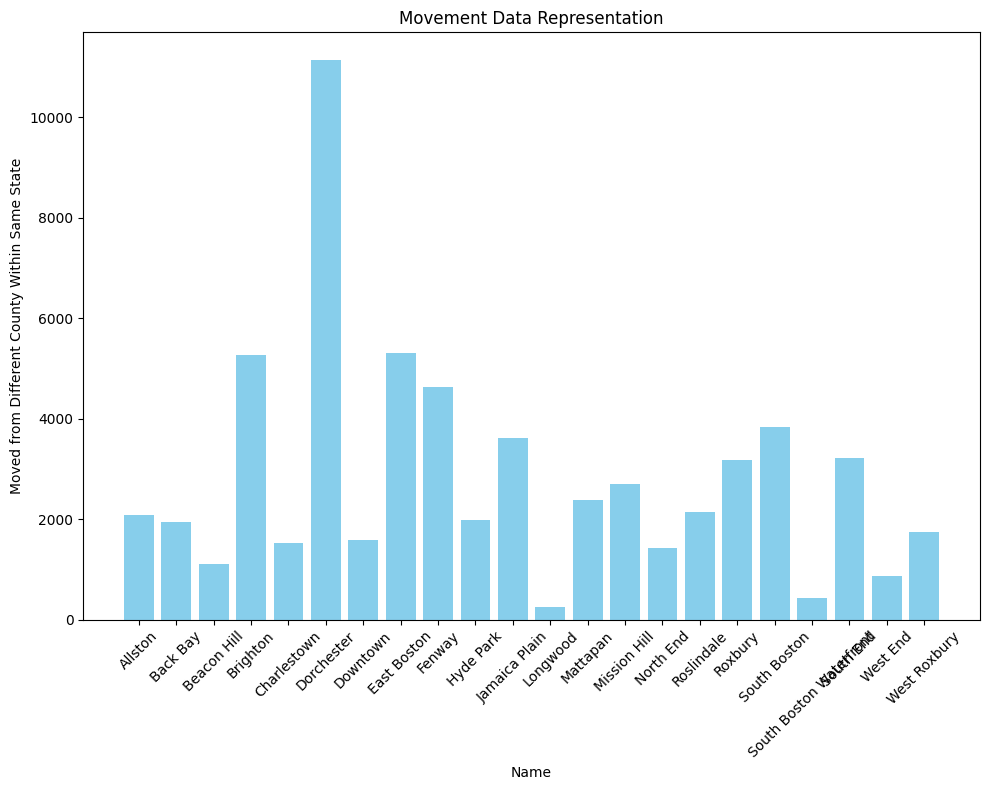

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('../data/Movement.csv')


print(data.columns)


data = data[data['Name'] != 'United States']
data = data[data['Name'] != 'Massachusetts']

data = data[data['Name'] != 'Boston']


data = data.dropna()

print(data)


plt.figure(figsize=(10, 8))
#?slightly different column but none the less important for my own analyzation
plt.bar(data['Name'], data['Moved within same county:'].astype(int), color='skyblue')
plt.xlabel('Name')  
plt.ylabel('Moved from Different County Within Same State')  
plt.title('Movement Data Representation')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

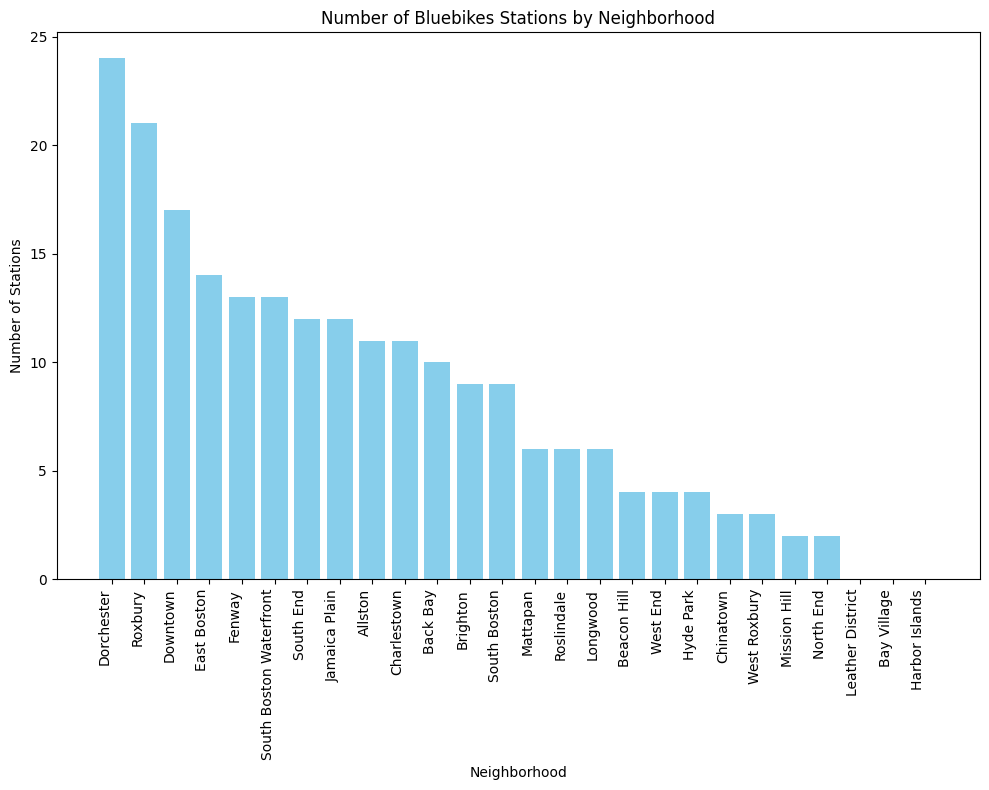

In [9]:

#?getting the number of bike stations per nieghborhood
station_counts = stations_in_neighborhoods.groupby('index_right').size()
neighborhoods_gdf['station_count'] = station_counts

neighborhoods_gdf['station_count'] = neighborhoods_gdf['station_count'].fillna(0)




neighborhood_station_counts = neighborhoods_gdf[['name', 'station_count']]

neighborhood_station_counts = neighborhood_station_counts.sort_values('station_count', ascending=False)

plt.figure(figsize=(10, 8))
plt.bar(neighborhood_station_counts['name'], neighborhood_station_counts['station_count'], color='skyblue')

plt.xlabel('Neighborhood')
plt.ylabel('Number of Stations')
plt.title('Number of Bluebikes Stations by Neighborhood')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()  
plt.show()


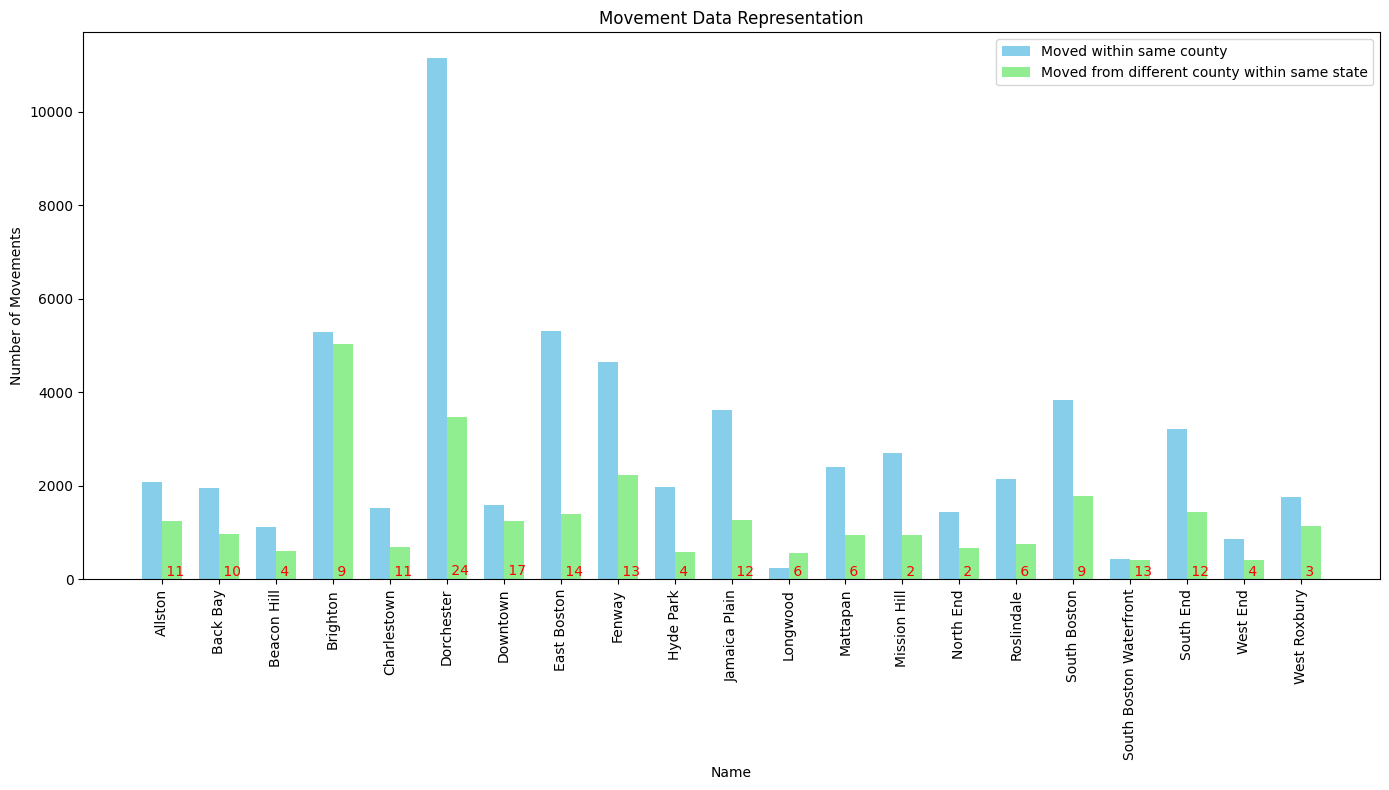

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



#? combined the two from above 
data = pd.read_csv('../data/Movement.csv')

data = data[~data['Name'].isin(['United States', 'Massachusetts', 'Boston'])]

data = data.dropna()
data = data[data['Name'] != 'Roxbury']


data = data[data['Name'].isin(neighborhood_station_counts['name'])]
neighborhood_station_counts = neighborhood_station_counts[neighborhood_station_counts['name'].isin(data['Name'])]


data.sort_values('Name', inplace=True)
neighborhood_station_counts.sort_values('name', inplace=True)



data.reset_index(drop=True, inplace=True)
neighborhood_station_counts.reset_index(drop=True, inplace=True)

positions = np.arange(len(data['Name']))

bar_width = 0.35

plt.figure(figsize=(14, 8))

plt.bar(positions - bar_width / 2, data['Moved within same county:'].astype(int), width=bar_width, color='skyblue', label='Moved within same county')

plt.bar(positions + bar_width / 2, data['Moved from different county within same state:'].astype(int), width=bar_width, color='lightgreen', label='Moved from different county within same state')

plt.xlabel('Name')
plt.ylabel('Number of Movements')
plt.title('Movement Data Representation')

plt.xticks(positions, data['Name'], rotation=90)

for pos, count in zip(positions, neighborhood_station_counts['station_count']):
    plt.text(pos, count, f' {int(count)}', color='red', verticalalignment='bottom')

plt.legend()

plt.tight_layout()  
plt.show()


/tmp/ipykernel_27665/2259486400.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Evictions['date'] = pd.to_datetime(Evictions['date'], errors='coerce', infer_datetime_format=True)
/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_27665/2259486400.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


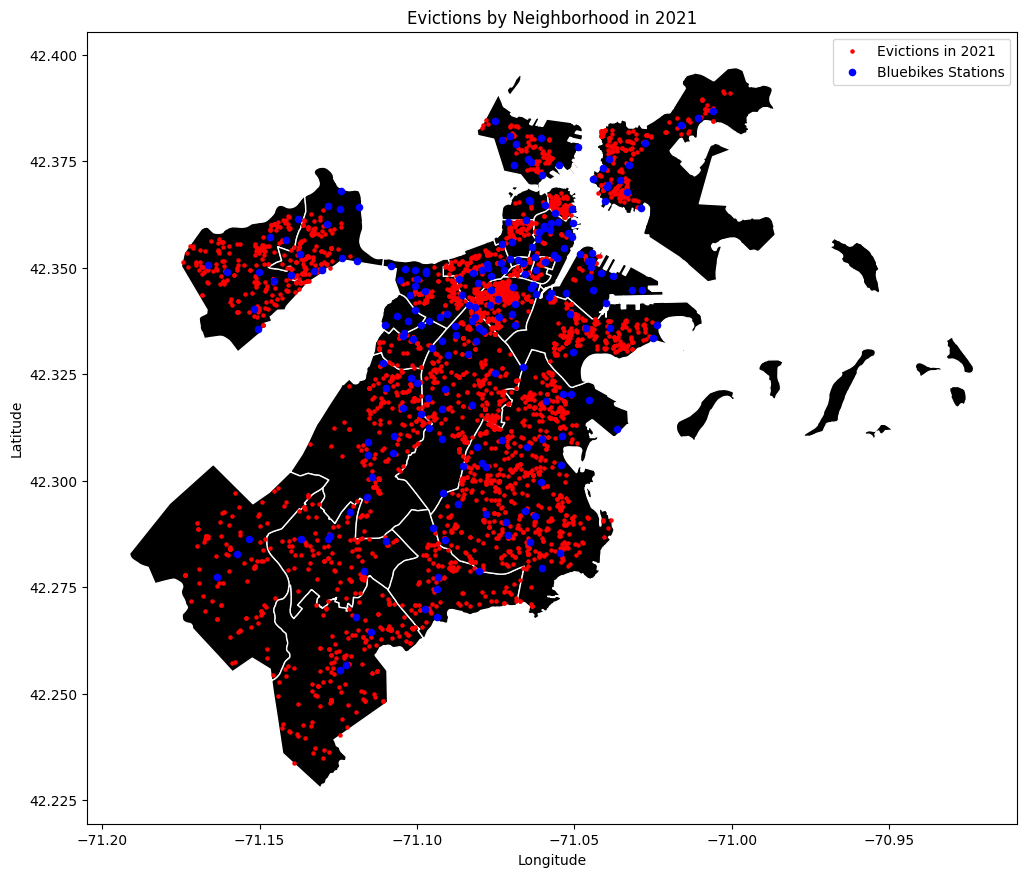

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


#?COmbined evictions and bike station data and sectioned it by neighborhood
neighborhoods_gdf = gpd.read_file('../data/BPDA_Neighborhood_Boundaries.geojson')

Evictions = pd.read_csv('../data/RentSmart.csv')

Evictions['date'] = pd.to_datetime(Evictions['date'], errors='coerce', infer_datetime_format=True)

Evictions_2021 = Evictions[Evictions['date'].dt.year == 2021]
Evictions_2021_gdf = gpd.GeoDataFrame(
    Evictions_2021, 
    geometry=gpd.points_from_xy(Evictions_2021.longitude, Evictions_2021.latitude),
    crs='EPSG:4326'
)

Evictions_in_neighborhoods_2021 = gpd.sjoin(Evictions_2021_gdf, neighborhoods_gdf, how='inner', op='within')

fig, ax = plt.subplots(figsize=(12, 12))
neighborhoods_gdf.plot(ax=ax, color='black', edgecolor='white', label='Neighborhoods')
Evictions_in_neighborhoods_2021.plot(ax=ax, markersize=5, color='red', label='Evictions in 2021')
stations_in_neighborhoods.plot(ax=ax, markersize=20, color='blue', label='Bluebikes Stations')

plt.legend()
plt.title('Evictions by Neighborhood in 2021')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


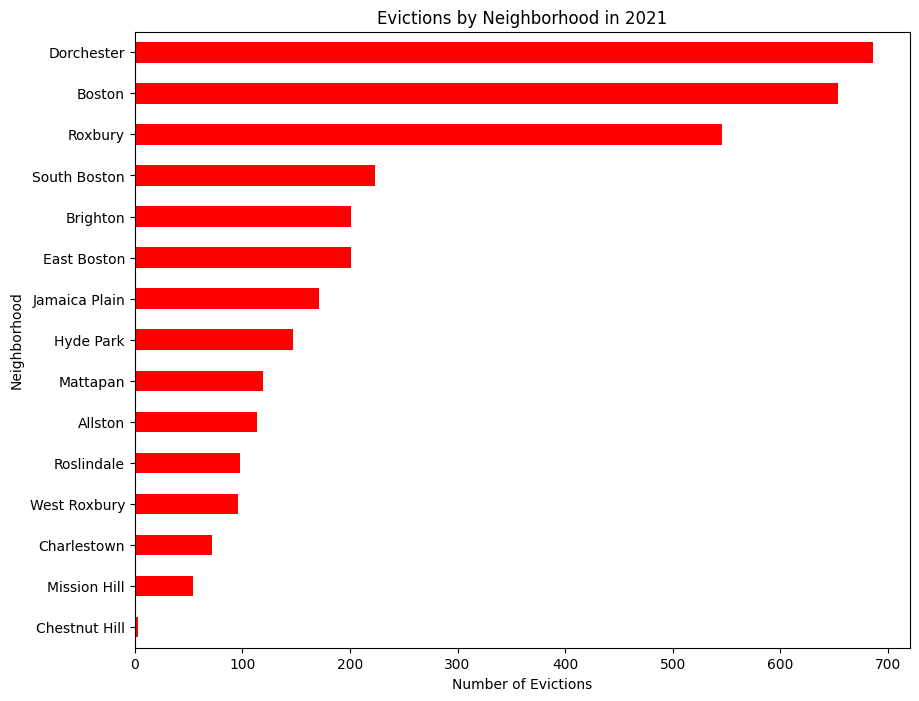

In [12]:

#? Literally just made this graph because I literally couldn't find it in the drive :(

eviction_counts = Evictions_2021['neighborhood'].value_counts()
Evictions_2021= Evictions_2021[Evictions_2021['neighborhood'] != 'Boston']

eviction_counts_sorted = eviction_counts.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
eviction_counts_sorted.plot(kind='barh', ax=ax, color='red')
ax.set_title('Evictions by Neighborhood in 2021')
ax.set_xlabel('Number of Evictions')
ax.set_ylabel('Neighborhood')

plt.show()



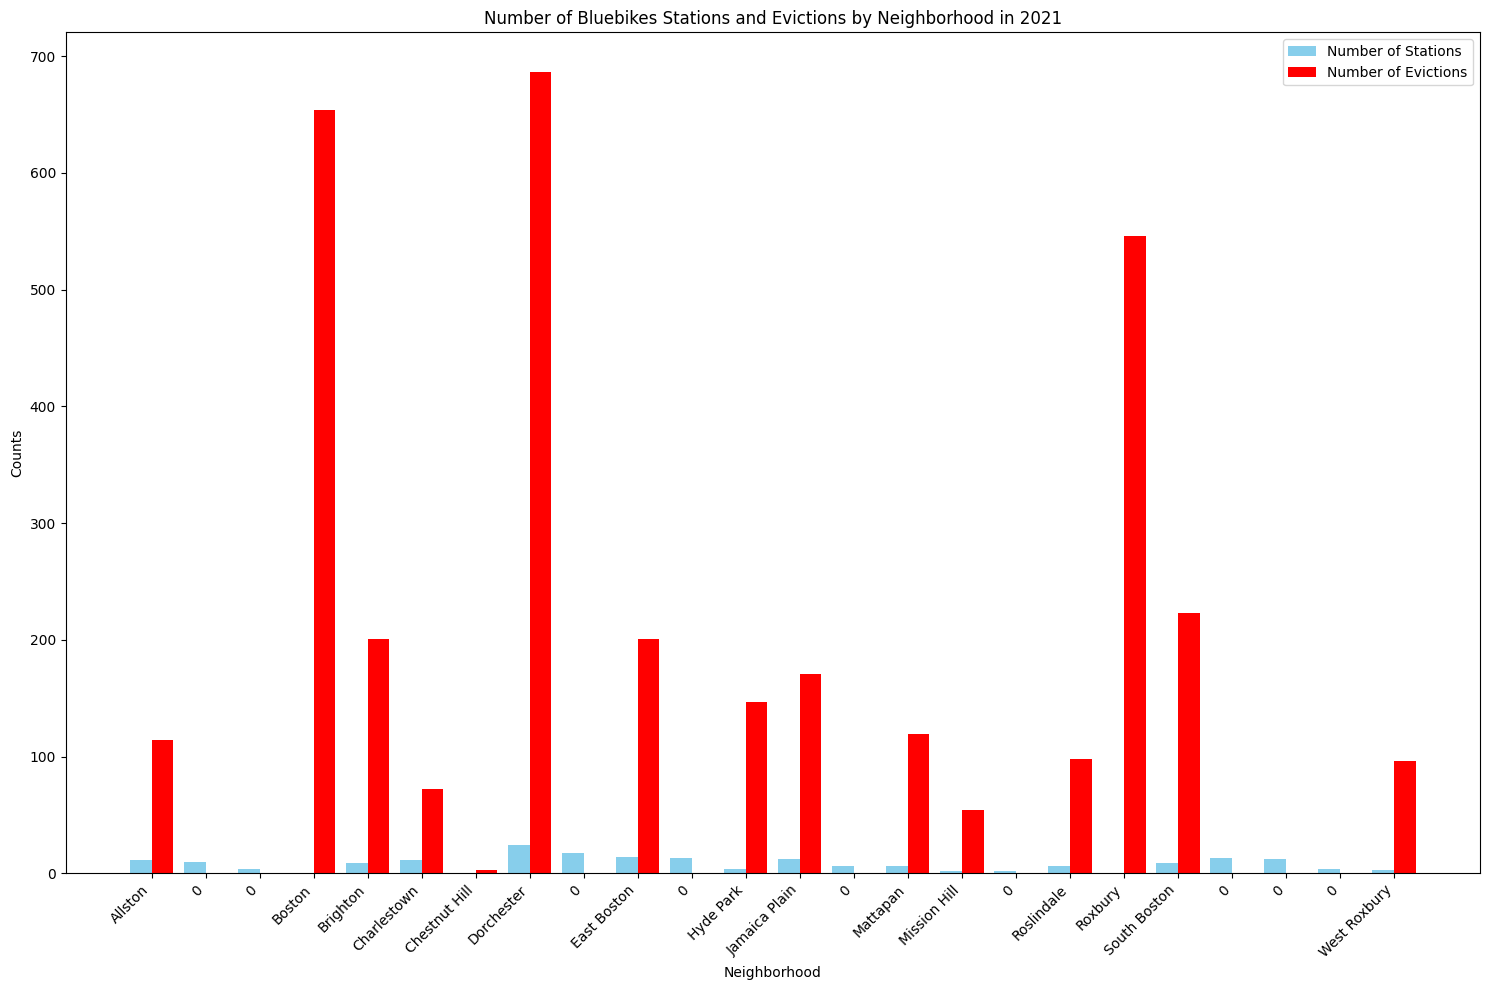

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

eviction_counts_df = eviction_counts.reset_index()
eviction_counts_df.columns = ['neighborhood', 'eviction_count']


merged_data = pd.merge(neighborhood_station_counts, eviction_counts_df, left_on='name', right_on='neighborhood', how='outer')

merged_data.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(15, 10))

indices = range(len(merged_data))
width = 0.4  

bar1 = ax.bar(indices, merged_data['station_count'], width, label='Number of Stations', color='skyblue')
bar2 = ax.bar([p + width for p in indices], merged_data['eviction_count'], width, label='Number of Evictions', color='red')

ax.set_xlabel('Neighborhood')
ax.set_ylabel('Counts')
ax.set_title('Number of Bluebikes Stations and Evictions by Neighborhood in 2021')
ax.set_xticks([p + width / 2 for p in indices])
ax.set_xticklabels(merged_data['neighborhood'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


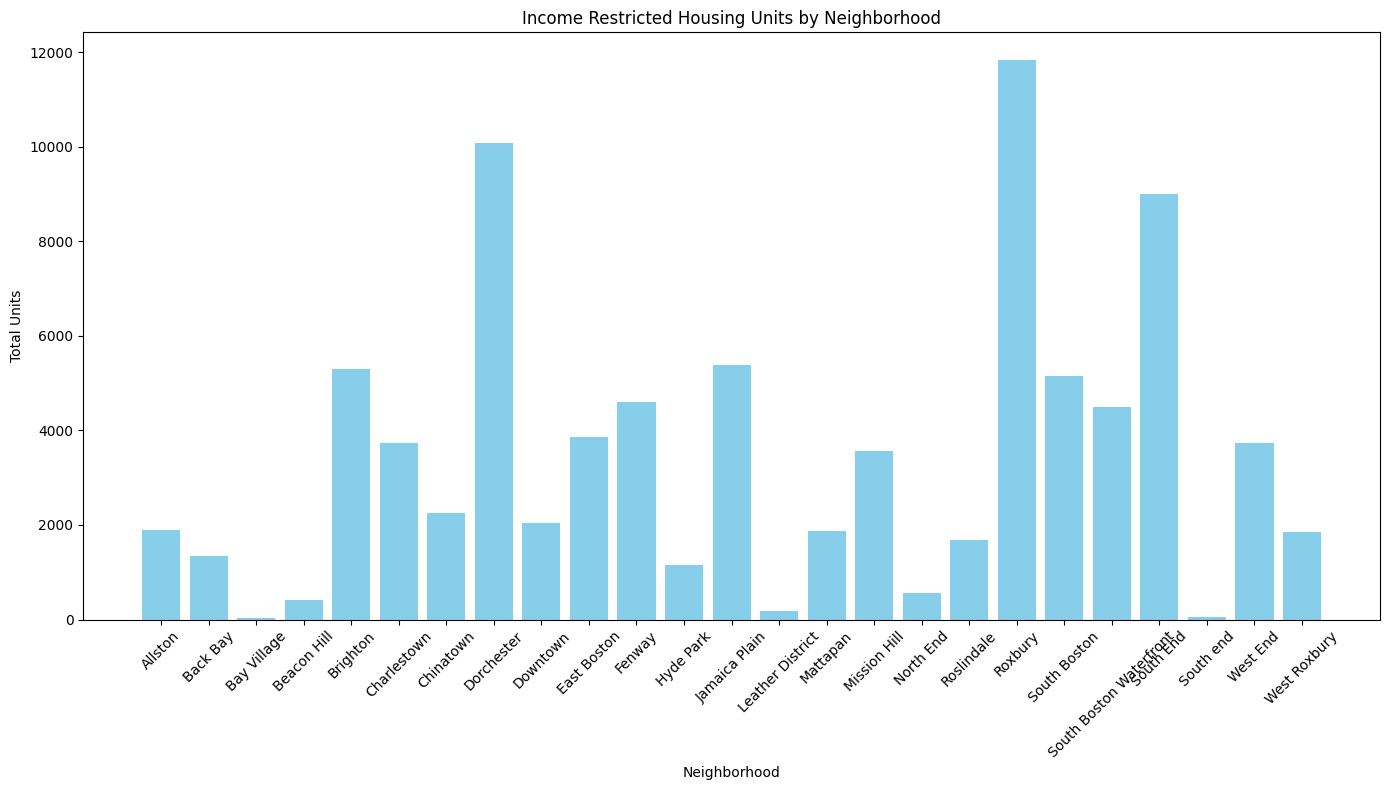

In [14]:



income_restricted_housing = pd.read_csv('../data/income-restricted-inventory-2021.csv')

income_restricted_housing = income_restricted_housing.groupby('Neighborhood').sum().reset_index()

plt.figure(figsize=(14, 8))
plt.bar(income_restricted_housing['Neighborhood'], income_restricted_housing['TtlProjUnits'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Total Units')
plt.title('Income Restricted Housing Units by Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import folium




#!THESE GRAPHS DONT REPRESENT THE DATA AS WELL AS I WANTED 

travel_df = pd.read_csv('202103-bluebikes-tripdata.csv')  


travel_df = travel_df[travel_df['start station latitude'] != travel_df['end station latitude']]
travel_df = travel_df[travel_df['start station longitude'] != travel_df['end station longitude']]

travel_df = travel_df.sample(n=100)
geometry = [LineString([(row['start station longitude'], row['start station latitude']), 
                        (row['end station longitude'], row['end station latitude'])]) for idx, row in travel_df.iterrows()]
routes_gdf = gpd.GeoDataFrame(travel_df, geometry=geometry, crs='EPSG:4326')

neighborhoods_gdf = gpd.read_file('BPDA_Neighborhood_Boundaries.geojson')   



map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

folium.GeoJson(
    neighborhoods_gdf,
    name='Neighborhoods',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.3,
    }
).add_to(map_boston)

for _, row in routes_gdf.iterrows():
    folium.PolyLine(
        locations=[
            [row.geometry.coords[0][1], row.geometry.coords[0][0]],
            [row.geometry.coords[1][1], row.geometry.coords[1][0]]
        ],
        color='blue',
        weight=3,
        opacity=0.8
    ).add_to(map_boston)

map_boston

map_boston.save('boston_routes.html')


/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_27665/2029784764.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


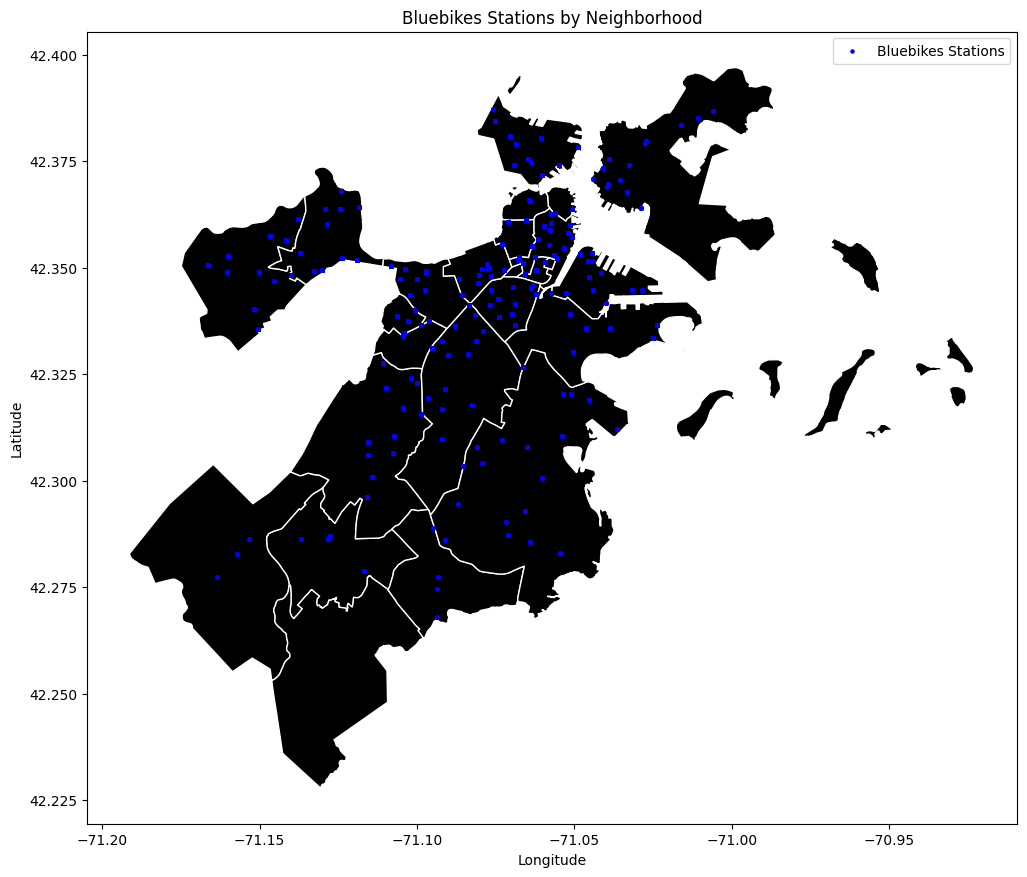

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



#! THIS CELL WAS LITERALLY FOR DEBUGGING PURPOSES 
neighborhoods_gdf = gpd.read_file('BPDA_Neighborhood_Boundaries.geojson')  


stations_df = pd.read_csv('202103-bluebikes-tripdata.csv') 


stations_df = stations_df[(stations_df['start station latitude'] != stations_df['end station latitude']) & 
                          (stations_df['start station longitude'] != stations_df['end station longitude'])]




stations_gdf = gpd.GeoDataFrame(
    stations_df, 
    geometry=gpd.points_from_xy(stations_df['start station longitude'], stations_df['start station latitude']),
    crs='EPSG:4326'
)

stations_in_neighborhoods = gpd.sjoin(stations_gdf, neighborhoods_gdf, how='inner', op='within')

fig, ax = plt.subplots(figsize=(12, 12))
neighborhoods_gdf.plot(ax=ax, color='black', edgecolor='white', label='Neighborhoods')
stations_in_neighborhoods.plot(ax=ax, markersize=5, color='blue', label='Bluebikes Stations')
plt.legend()
plt.title('Bluebikes Stations by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/tmp/ipykernel_27665/2394312211.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  routes_df = stations_df[(routes_df['start station latitude'] != routes_df['end station latitude']) &
/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_27665/2394312211.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


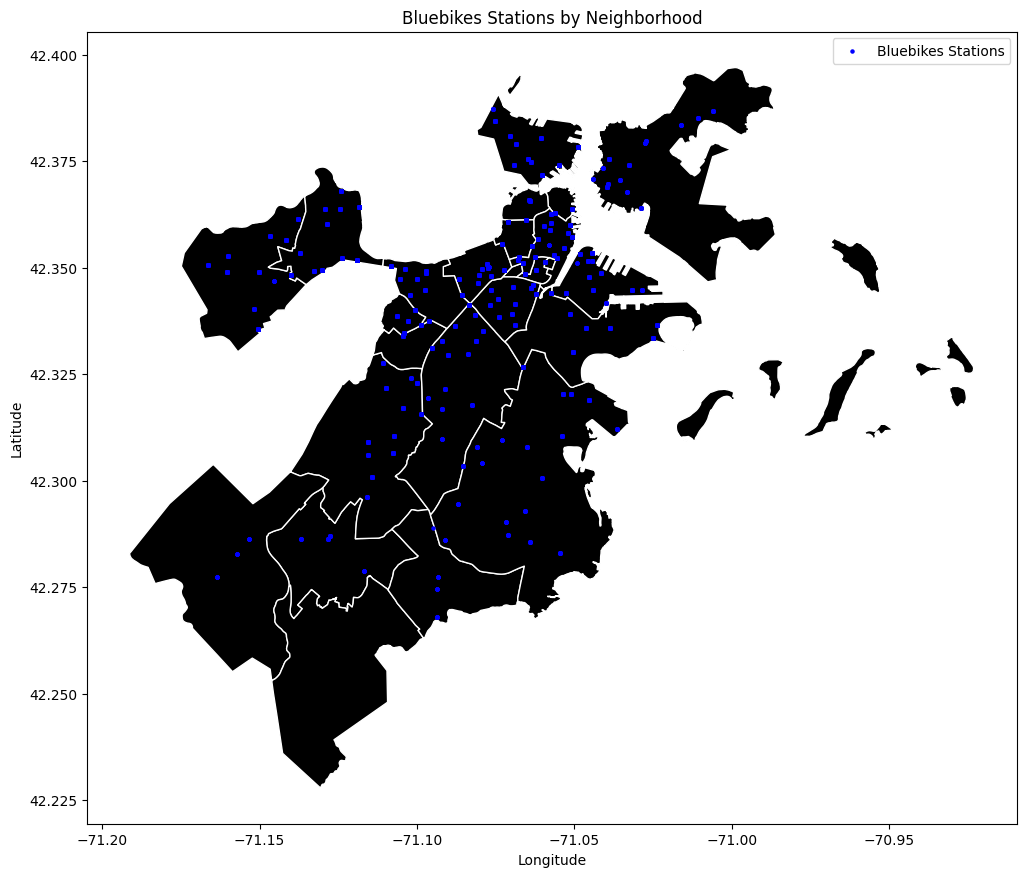

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

neighborhoods_gdf = gpd.read_file('BPDA_Neighborhood_Boundaries.geojson')  


routes_df = pd.read_csv('202103-bluebikes-tripdata.csv')  



routes_df = stations_df[(routes_df['start station latitude'] != routes_df['end station latitude']) & 
                          (routes_df['start station longitude'] != routes_df['end station longitude'])]



routes_df.to_csv('routes.csv', index=False)


routes_gdf = gpd.GeoDataFrame(
    routes_df, 
    geometry=gpd.points_from_xy(routes_df['end station longitude'], routes_df['end station latitude']),
    crs='EPSG:4326'
)

routes_in_neighborhoods = gpd.sjoin(routes_gdf, neighborhoods_gdf, how='inner', op='within')

fig, ax = plt.subplots(figsize=(12, 12))
neighborhoods_gdf.plot(ax=ax, color='black', edgecolor='white', label='Neighborhoods')
routes_in_neighborhoods.plot(ax=ax, markersize=5, color='blue', label='Bluebikes Stations')
plt.legend()
plt.title('Bluebikes Stations by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
